# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

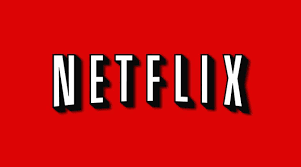

# **In this project, you are required to do**
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features

# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

Lets begin with our first step that is importing the Drive.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Reading the Dataset
df=pd.read_csv('/content/drive/MyDrive/Machine Learning Unsupervised Clustering Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

#**Data Overview**


In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.shape

(7787, 12)

Our data has 7787 rows and 12 columns

In [6]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


There are lots of NAN values.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# **Checking Null Values**

In [8]:
# Checking the Null values in all columns.
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

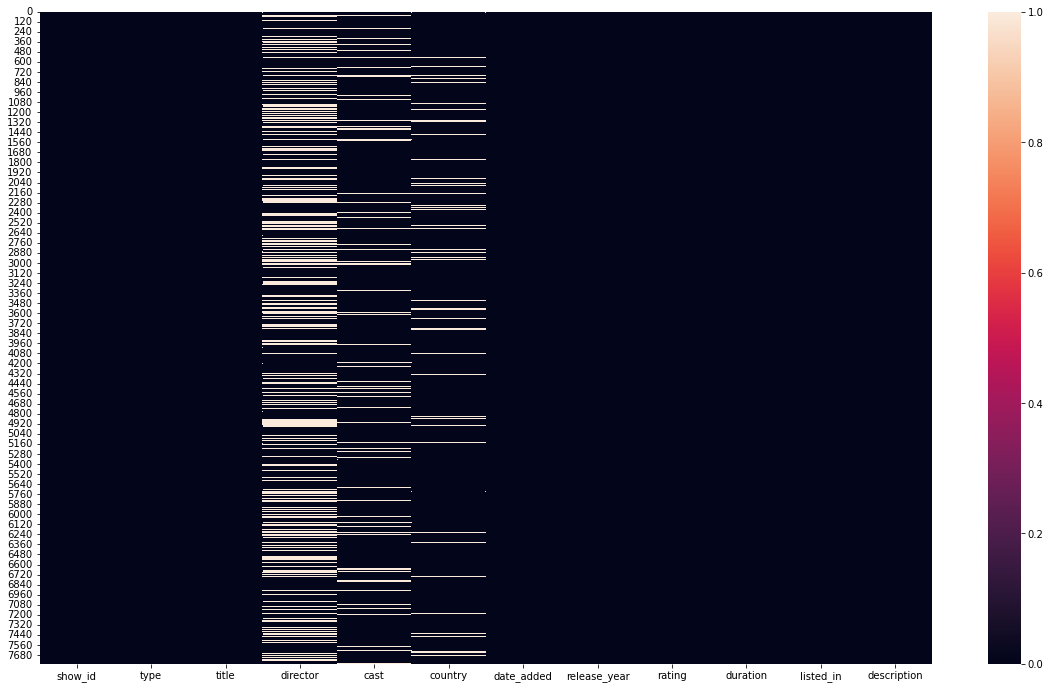

In [9]:
#checking null values by visualizing it
plt.figure(figsize=(20,12))
sns.heatmap(df.isna())

We have Null value in director, cast, country, date, rating.

## **Null Values Treatment**

1. RATING & COUNTRY - Replacing nulls with mode

2. CAST- Filling nulls with 'unknown'.

3. DATE - there are few missing values for date column. so, lets drop missing value rows.

4. DIRECTOR - Director column has more then 30% null values so we will not use it for our model but will keep it for EDA - Filling nulls with 'unknown'.

In [ ]:
#Replacing missing values in 'director' column with value 'unknown'
df['director'].replace(np.nan, "unknown",inplace  = True)

#Replacing missing values in 'cast' column with value 'unknown'
df['cast'].replace(np.nan, "unknown",inplace  = True)

#Replacing missing values in 'country' column with mode
df['country']= df['country'].fillna(df['country'].mode()[0])


#Replacing missing values in 'rating' column with value most frequent rating i.e. mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Dropping the null values in 'date_added'
df = df[df['date_added'].notna()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


###Hence from the above analysis it is states that there is no more Null Values present in our dataset.

In [ ]:
# Checking any duplicate value present in Dataset.
df.duplicated().sum()

0

###No Duplicates value found in the Dataset.


# **Exploratory Data Analysis.**

##**TYPE OF CONTENT**

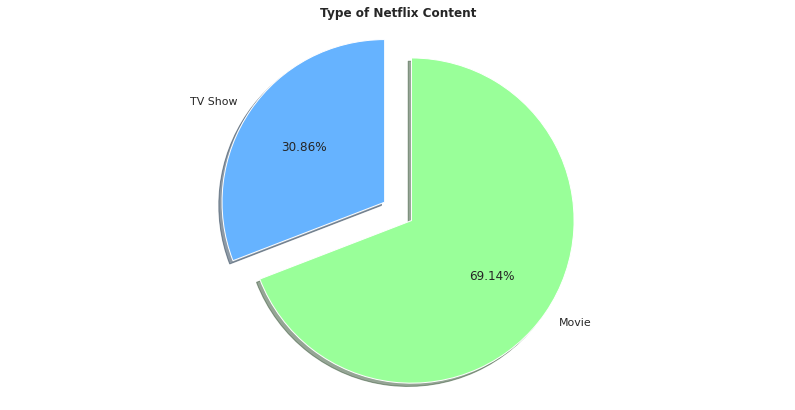

In [ ]:
# Plotting Pie Chart between the TV- Shows and Movies of Netflix Dataset.
plt.figure(figsize=(14,7))
content=['TV Show','Movie']
colors = ['#66b3ff','#99ff99']
plt.pie(df['type'].value_counts().sort_values(),labels=content,explode=[0.1,0.1],autopct='%1.2f%%',startangle=90,shadow=True,colors=colors)
plt.title('Type of Netflix Content',fontweight='bold')
plt.axis('equal')
plt.show()


##From the Pie Chart we can see that there are about 70% movies and 30% TV shows on Netflix.

##**TOP 10 COUNTRIES**

In [ ]:
# Now we can see the Top 10 Countries from the datset.
#FEATURE ENGINEERING - Creating a new feature 'top_Country'
df['top_country']=df['country'].apply(lambda x:x.split(',')[0])

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,top_country
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States


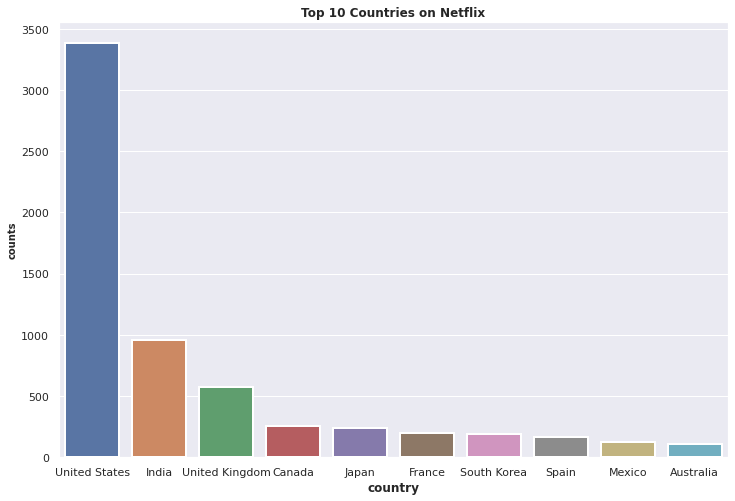

In [ ]:
# Plotting the plot for Top 10 Country on Netflix.
plt.figure(figsize=(12,8))
sns.set()
ax=sns.countplot(x='top_country',lw=2,data=df,order=df['top_country'].value_counts().index[0:10])
plt.title('Top 10 Countries on Netflix',fontweight='bold')
plt.xlabel('country',fontweight='bold',fontsize=12)
plt.ylabel('counts',fontweight='bold',fontsize=10)
plt.show()


###From the above plot we can say that The United States has the most number of content on Netflix by a huge margin followed by India.

##**Number of TV shows and Movies in top 10 Countries**

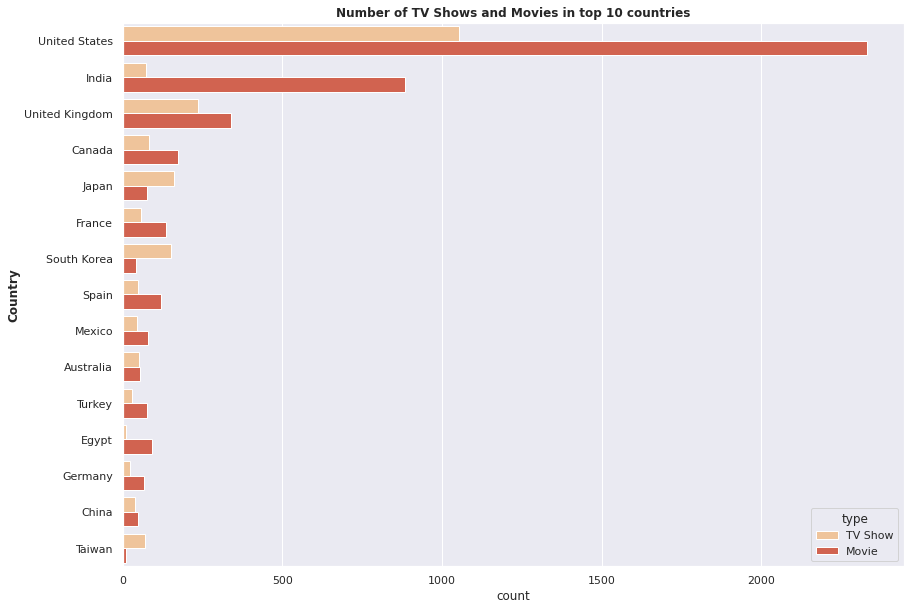

In [ ]:
#Number of TV Shows and Movies content in top 10 countries with maximum content
sns.set()
fig=plt.figure(figsize=(14,10))
ax=sns.countplot(y="top_country",data= df,hue= "type",order = df['top_country'].value_counts().index[0:15],palette='OrRd')
plt.ylabel('Country',fontweight='bold')
plt.title("Number of TV Shows and Movies in top 10 countries",fontweight="bold")
plt.show()

###Most of the countries have more movies than TV shows, But you can see that for South Korea and Japan it's the opposite. It maybe because KDramas and Anime are more popular in these two countries respectively.

#**Top Movie Rating Based On Rating System**

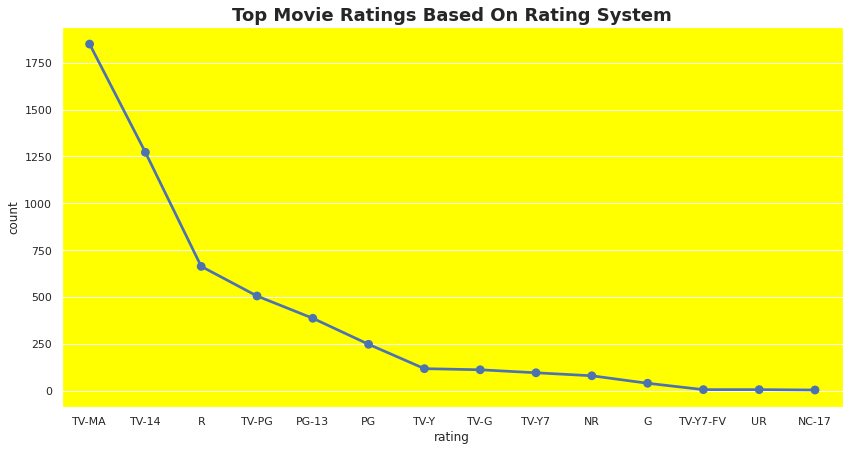

In [ ]:
#Rating based on Rating System of all the movies
df_movies=df[df['type']=='Movie']
movie_ratings=df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_facecolor("yellow")
sns.pointplot(x='rating',y='count',data=movie_ratings,)
plt.title('Top Movie Ratings Based On Rating System',size='18',fontweight='bold')
plt.show()

###Most number of movies rated TV-MA i.e. Adult Rating

#**Top TV shows Rating Based on Rating System**

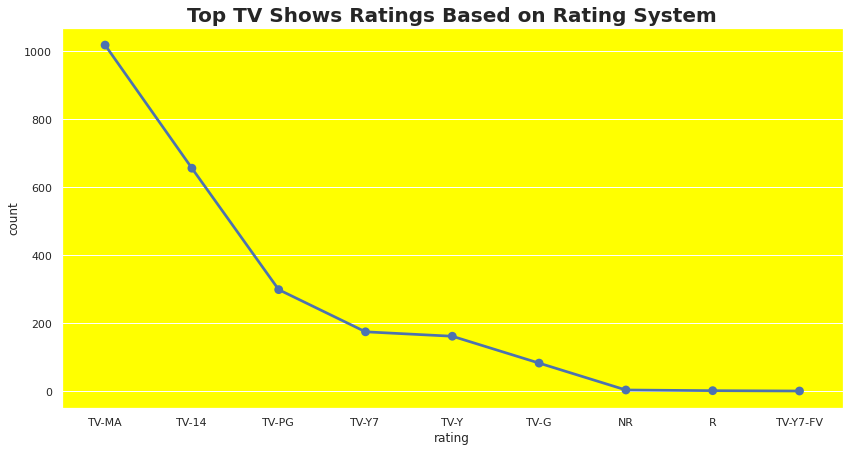

In [ ]:
#Rating based on Rating System of all the TV Shows
df_tv=df[df['type']=='TV Show']
shows_ratings=df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig,ax=plt.subplots(figsize=(14,7))
ax.set_facecolor("yellow")
sns.pointplot(x='rating',y='count',data=shows_ratings)
plt.title('Top TV Shows Ratings Based on Rating System',size='20',fontweight='bold')
plt.show()

###Most number of TV Shows rated TV-MA i.e. Adult Rating

#**Number of Movies Release  in last 15 Years**

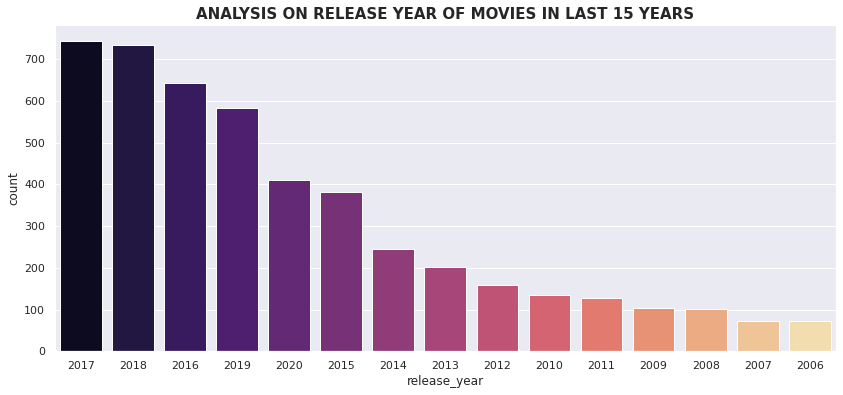

In [ ]:
#Analysing how many movies released per year in last 15 years
plt.figure(figsize=(14,6))
plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES IN LAST 15 YEARS', fontsize=15, fontweight='bold')
sns.countplot(x=df_movies['release_year'],data=df_movies,order=df_movies['release_year'].value_counts().index[0:15],palette='magma')

###Year 2017 has the highest movie released

#**Number of TV shows Release in Last 15 Years**

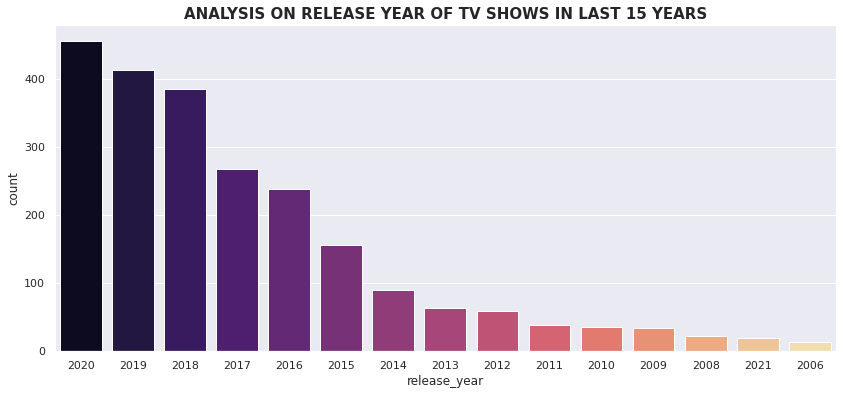

In [ ]:
#Analysing how many TV SHOWS released per year in last 15 years
plt.figure(figsize=(14,6))
plt.title('ANALYSIS ON RELEASE YEAR OF TV SHOWS IN LAST 15 YEARS', fontsize=15, fontweight='bold')
sns.countplot(x=df_tv['release_year'],data=df_tv,order=df_tv['release_year'].value_counts().index[0:15],palette="magma")

###Year 2020 has the highest number of TV Shows released.

#**Top 10 Genre's on Netflix** 

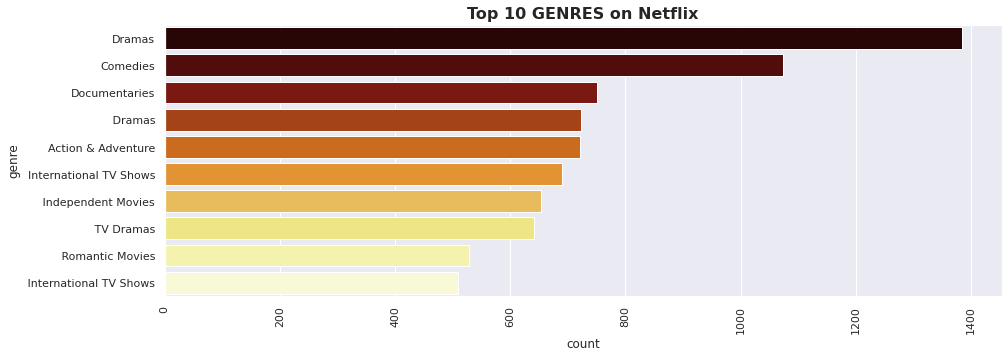

In [ ]:
#Top 10 genres plot

#splitting into list
df['listed_in'] = df['listed_in'].apply(lambda x :  x.split(',')) 
genre_count = []
#count genre for each movie
for i in df['listed_in']: 
  genre_count += i
    
genre_dict = dict((i, genre_count.count(i)) for i in genre_count)

df_genre_count = pd.DataFrame(genre_dict.values(),genre_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'genre', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(15,5))
sns.barplot(y='genre',x='count',data=df_genre_count,palette="afmhot")
plt.title("Top 10 GENRES on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

###Drama is the most popular genre followed by comedy.

In [ ]:
#Getting Movies and TV show records in seperate dataframes
movies_df= df[df['type']=='Movie']
tvshow_df= df[df['type']=='TV Show']
movies_df.shape

(5377, 13)

#**Top 10 Genres For Movies**

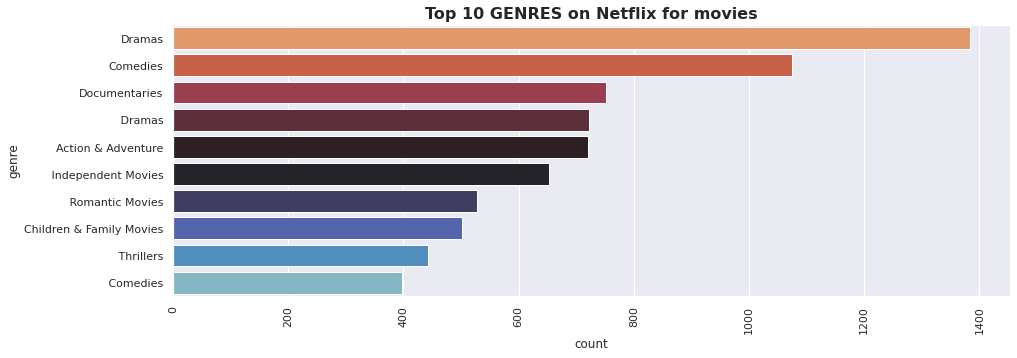

In [ ]:
#Top 10 genres for movies
genre_count = []
for i in movies_df['listed_in']: 
  genre_count += i
    
genre_dict = dict((i, genre_count.count(i)) for i in genre_count)

df_genre_count = pd.DataFrame(genre_dict.values(),genre_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'genre', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(15,5))
sns.barplot(y='genre',x='count',data=df_genre_count,palette="icefire_r")
plt.title("Top 10 GENRES on Netflix for movies",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

### In Movies Drama is the most popular genre followed by comedy.

#**Top 10 Genres For TV shows**

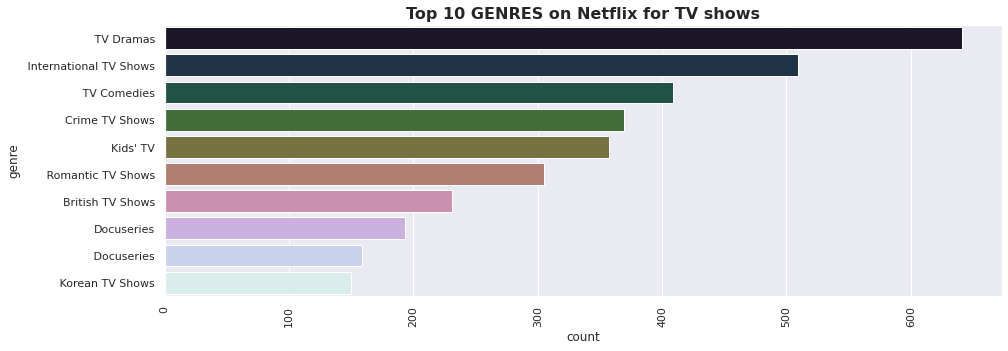

In [ ]:
#Top 10 genres for TV shows
genre_count = []
for i in tvshow_df['listed_in']: 
  genre_count += i
    
genre_dict = dict((i, genre_count.count(i)) for i in genre_count)

df_genre_count = pd.DataFrame(genre_dict.values(),genre_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'genre', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(15,5))
sns.barplot(y='genre',x='count',data=df_genre_count,palette="cubehelix")
plt.title("Top 10 GENRES on Netflix for TV shows",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

###In TV Shows Drama is the most popular genre followed by International TV shows.

#**Top 10 Director's on Netflix**

In [ ]:
#creating copy for plot
direc=df.copy()
#removing unknown 
direc=direc[df['director']!='unknown']

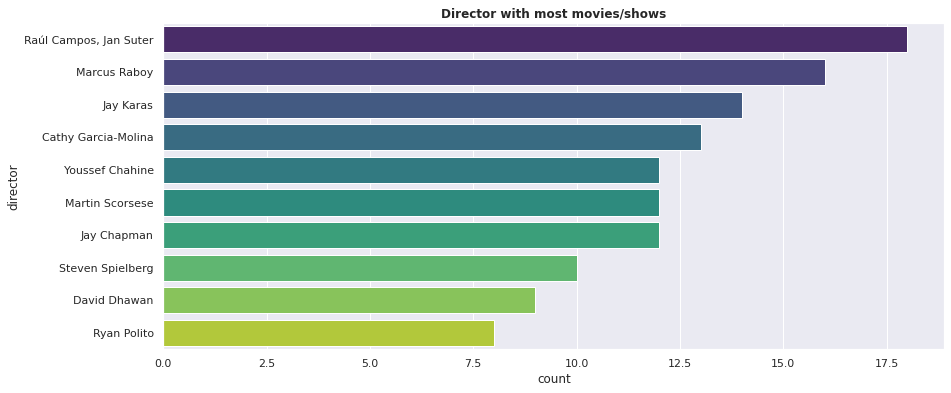

In [ ]:
#plot for top 10 director

plt.figure(figsize = (14,6))
sns.countplot(y='director',data=direc,order=direc.director.value_counts().head(10).index,palette="viridis")
plt.title('Director with most movies/shows',fontweight="bold")
plt.show()

###Raul Campos and Jan Sulter collectively have the most content on Netflix.

#**Content Release Monthwise**

In [ ]:
#feature engineering
#getting date in the right format and year/month extraction
df ['date_added'] = pd.to_datetime(df['date_added'])
df ['year_added'] = df['date_added'].dt.year
df ['month_added'] = df['date_added'].dt.month

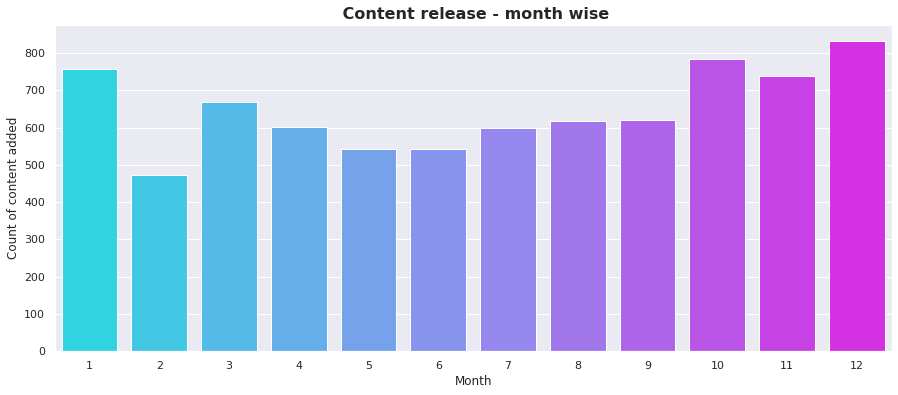

In [ ]:
#plot for month wise content release
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x='month_added',data=df,palette="cool")

plt.title(' Content release - month wise',size='16',fontweight="bold")    
plt.xlabel('Month')
plt.ylabel('Count of content added')
plt.show()

###More of the content is released in holiday season - October, November, December and January.

#**Content Release per Year**

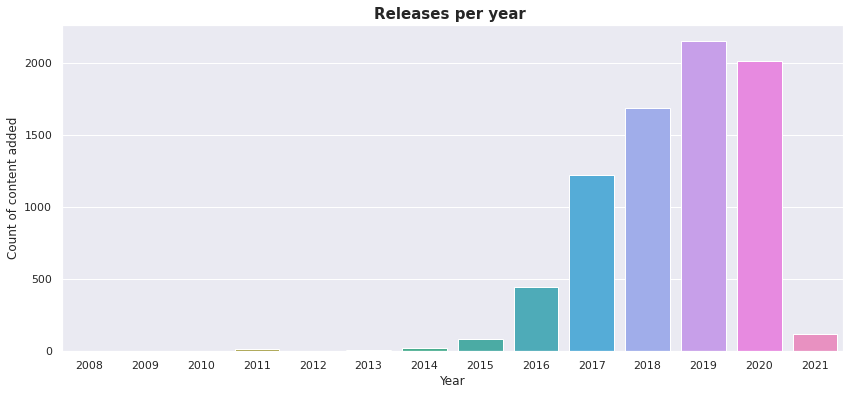

In [ ]:
#plot for year wise content release
sns.set(rc={'figure.figsize':(14,6)})
sns.countplot(x='year_added',data=df)

plt.title('Releases per year ',size='15',fontweight="bold")    
plt.xlabel('Year')
plt.ylabel('Count of content added')
plt.show()

###The number of release have significantly increased after 2015 and have dropped in 2021 because of Covid 19

#**Checking the distribution of Movie Durations**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


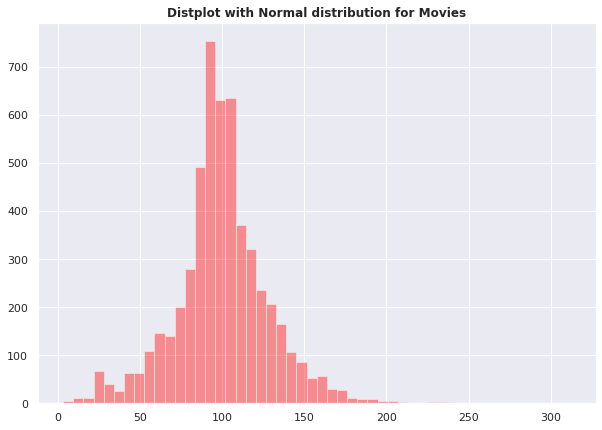

In [ ]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

###Mainly the movie duration is in b/w 55 to 150 minutes.



#**Top 10 Actor's on Netflix**

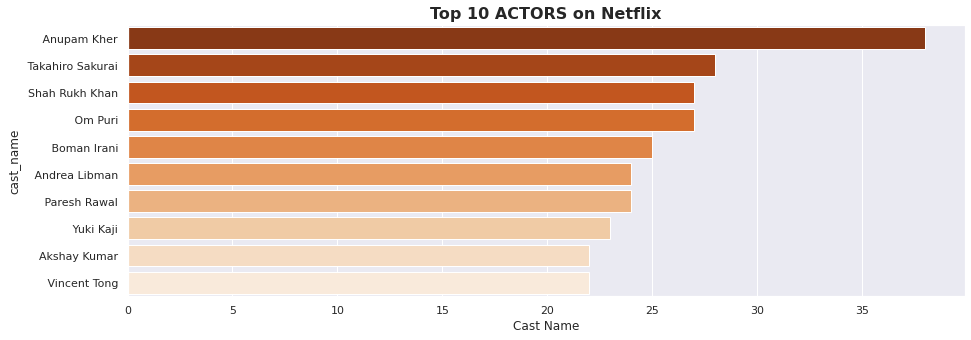

In [ ]:
#getting plot for top actors

#splitting into list
df['cast_name'] = df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []

#count movies for each actor
for i in df['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(15,5))
sns.barplot(y='cast_name',x='count',data=df_cast_count,palette="Oranges_r")
plt.title("Top 10 ACTORS on Netflix",size='16',fontweight="bold")
plt.xlabel('Cast Name')
plt.show()

###Anupam Kher Have the most number of films on Netflix followed by Takahiro Sakurai And Shah Rukh Khan.

#**Distribution of Tv shows duration.**

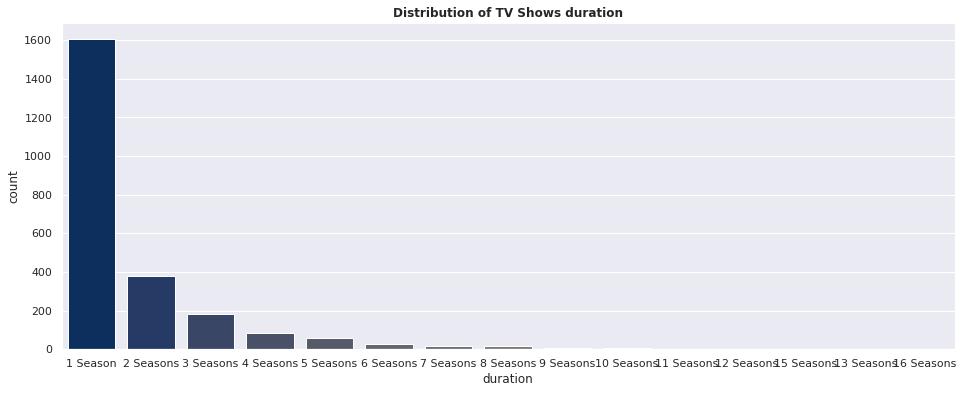

In [ ]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(16,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=df_tv['duration'],data=df_tv,order = df_tv['duration'].value_counts().index,palette="cividis")

###Mostly every TV Shows has atleast 3 seasons.



#**Type of content available in different countries.**

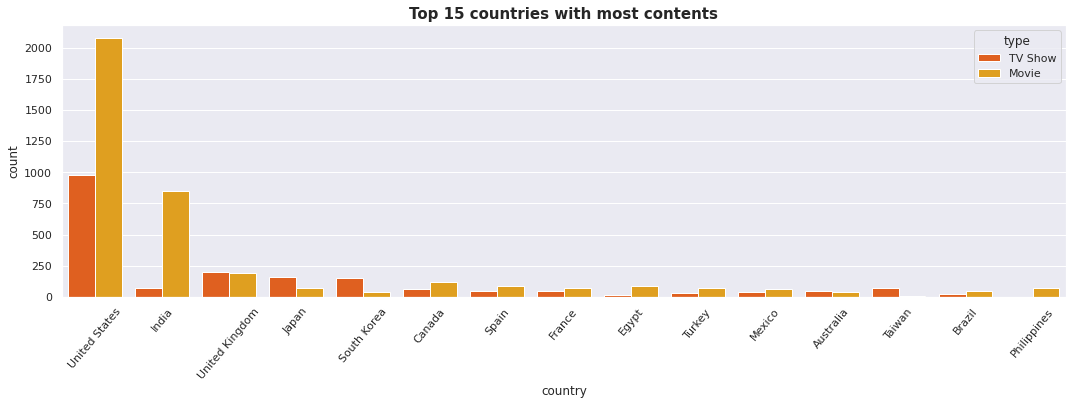

In [ ]:
#Analysing top15 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=df['country'],palette="autumn",order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

###Movies are more available in different countries than TV SHOWS.

#**Making Some Hypothesis Testing.** 

In [ ]:
#Checking the info to know the dtypes of all features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
 12  top_country   7777 non-null   object        
 13  year_added    7777 non-null   int64         
 14  month_added   7777 non-null   int64         
 15  cast_name     7777 non-null   object  


###**Given**: In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled.

###**HYPOTHESIS** - Number of TV shows on Netflix have tripled and number of movies have reduced by 2000 between 2010 and 2018.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


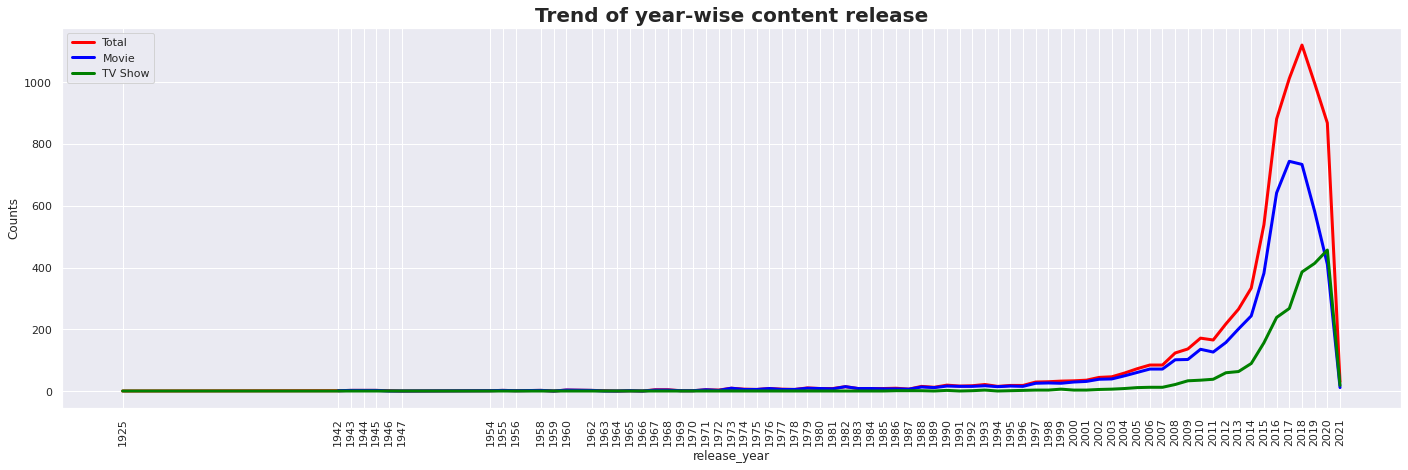

In [ ]:
#Visualize the growth of netflix industry over the years

year_data = df['release_year'].value_counts().sort_index().loc[:2021]
type_data = df.groupby('release_year')['type'].value_counts().unstack().loc[:2021]


plt.figure(figsize=(24,7))

sns.lineplot(x=year_data.index,y=year_data, color = 'red', linewidth=3, label='Total')
sns.lineplot(type_data.index, type_data['Movie'], color='blue', linewidth=3, label='Movie')
sns.lineplot(type_data.index, type_data['TV Show'], color='green', linewidth=3, label='TV Show')

plt.xticks(year_data.index.unique())
plt.title("Trend of year-wise content release", weight='bold', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Counts')
plt.legend(loc='upper left')

In [ ]:
#Checking the trend between 2010 and 2018
df_2010 = df[df['year_added']>=2010]
df_2k10_18 = df[df['year_added']<=2018]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of content added')

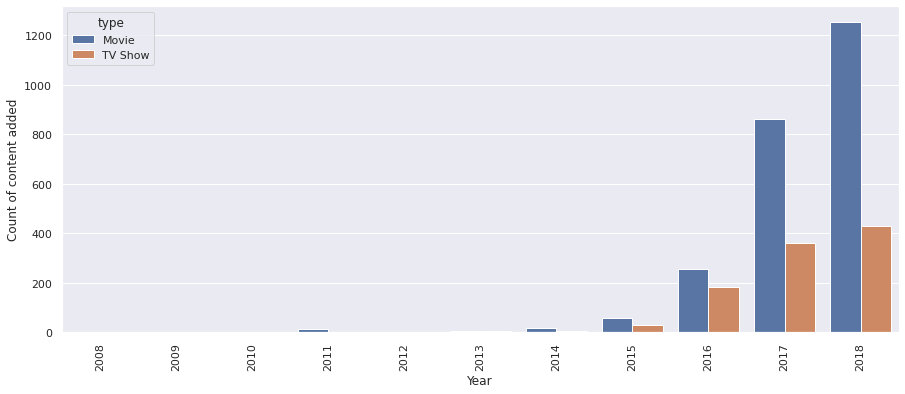

In [ ]:
#overall year_added analysis
plt.figure(figsize=(15,6))
sns.countplot(df_2k10_18["year_added"],hue=df_2k10_18["type"])
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Count of content added')

###RESULT: Irrespective of the release years, There is no decline in the number of movies.Also number if movies added has always been more than the number of tv shows added. So with this information, we hereby reject our Hypothesis.

#**Data Preprocessing**

In [ ]:
#Converting decription of column to list 
X = df['description'].tolist()
X

['In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.',
 'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.',
 "When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",
 'In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.',
 'A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.',
 'A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect.',
 'After an awful accident, a couple admitted to a grisly hospital are separated and must find each o

In [ ]:
#Changing all the text into lower case
X = [low.lower() for low in X]

In [ ]:
#Handling all the urls if any
X = [re.sub("\w+://\S+","", urls) for urls in X]

In [ ]:
#handling all the handles('@') if any
X =[re.sub("@\w+","", handles) for handles in X]

In [ ]:
#Tokenizing the text
X= [word_tokenize(word) for word in X]

In [ ]:
#Removing stopwords, appostrophes and punctuation from the text
stop_nltk = stopwords.words("english")
stop_punct = list(punctuation)


In [ ]:
#Adding some specific punctuation from the  data :
stop_punct.extend(['...','``',"''",".."])
stop_context = ['rt', 'amp',"'s"]

#Final stop word list including all of these:
stop_final = stop_nltk + stop_punct + stop_context

In [ ]:
#A function to remove the stop words
def del_stop(sent):
    return [re.sub("#","",term) for term in sent if ((term not in stop_final) & (len(term)>1))]

#Applying the function on the data:
X_clean = [del_stop(clean) for clean in X]

In [ ]:
#Making  a list where all the words of the cleaned data is present
term_list = []
for i in X_clean:
    term_list.extend(i)

#Using counter to get top terms:
res = Counter(term_list)
res.most_common(10)

[('life', 705),
 ('young', 655),
 ('new', 603),
 ('family', 550),
 ('world', 477),
 ('man', 472),
 ('love', 441),
 ('two', 434),
 ('woman', 427),
 ('friends', 383)]

In [ ]:
#Joining all the words to form a string
X_clean = [" ".join(label) for label in X_clean]

#**Tfidf**


In [ ]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(X_clean)
X_tfidf.shape

(7777, 5000)

In [ ]:
# convert X into array form for clustering
X = X_tfidf.toarray()

#**Finding number of clusters using elbow method**

In [ ]:
sse=[]
for i in range(1,25):
    model = KMeans(n_clusters=i)
    model.fit(X)
    error = model.inertia_
    sse.append(error)
    print('cluster: %d \t SSE: %0.2f'%(i,error))

cluster: 1 	 SSE: 7724.51
cluster: 2 	 SSE: 7706.33
cluster: 3 	 SSE: 7689.28
cluster: 4 	 SSE: 7675.98
cluster: 5 	 SSE: 7661.96
cluster: 6 	 SSE: 7651.62
cluster: 7 	 SSE: 7642.53
cluster: 8 	 SSE: 7627.41
cluster: 9 	 SSE: 7614.44
cluster: 10 	 SSE: 7602.91
cluster: 11 	 SSE: 7602.42
cluster: 12 	 SSE: 7586.94
cluster: 13 	 SSE: 7579.45
cluster: 14 	 SSE: 7567.92
cluster: 15 	 SSE: 7561.26
cluster: 16 	 SSE: 7552.22
cluster: 17 	 SSE: 7545.50
cluster: 18 	 SSE: 7537.46
cluster: 19 	 SSE: 7535.74
cluster: 20 	 SSE: 7523.18
cluster: 21 	 SSE: 7520.39
cluster: 22 	 SSE: 7511.10
cluster: 23 	 SSE: 7508.36
cluster: 24 	 SSE: 7494.37


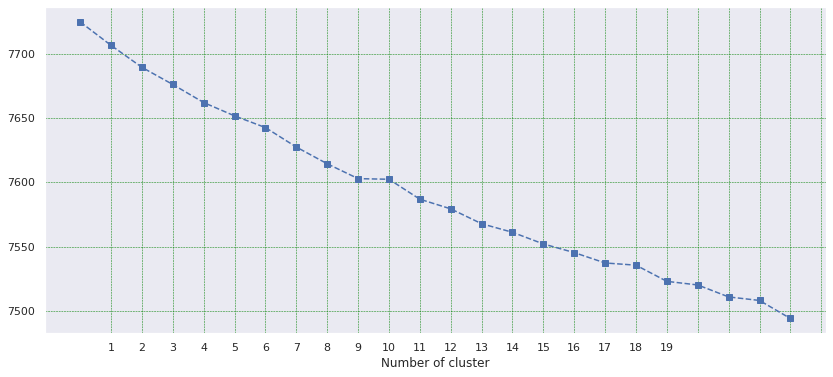

In [ ]:
plt.plot(sse,'bs--')
plt.xticks(list(range(1,25)),list(range(1,20)))
plt.grid(color='green',linestyle='--',linewidth=0.5)
plt.xlabel('Number of cluster')
plt.show()

#**Finding number of Clusters from Sillhoute's score**


In [ ]:
sill = [] # sillhoute score
for i in range(2,25):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0014
cluster: 3 	 Sillhoute: 0.0017
cluster: 4 	 Sillhoute: 0.0023
cluster: 5 	 Sillhoute: 0.0030
cluster: 6 	 Sillhoute: 0.0032
cluster: 7 	 Sillhoute: 0.0032
cluster: 8 	 Sillhoute: 0.0037
cluster: 9 	 Sillhoute: 0.0042
cluster: 10 	 Sillhoute: 0.0045
cluster: 11 	 Sillhoute: 0.0048
cluster: 12 	 Sillhoute: 0.0049
cluster: 13 	 Sillhoute: 0.0055
cluster: 14 	 Sillhoute: 0.0057
cluster: 15 	 Sillhoute: 0.0062
cluster: 16 	 Sillhoute: 0.0060
cluster: 17 	 Sillhoute: 0.0063
cluster: 18 	 Sillhoute: 0.0060
cluster: 19 	 Sillhoute: 0.0065
cluster: 20 	 Sillhoute: 0.0064
cluster: 21 	 Sillhoute: 0.0067
cluster: 22 	 Sillhoute: 0.0066
cluster: 23 	 Sillhoute: 0.0070
cluster: 24 	 Sillhoute: 0.0068


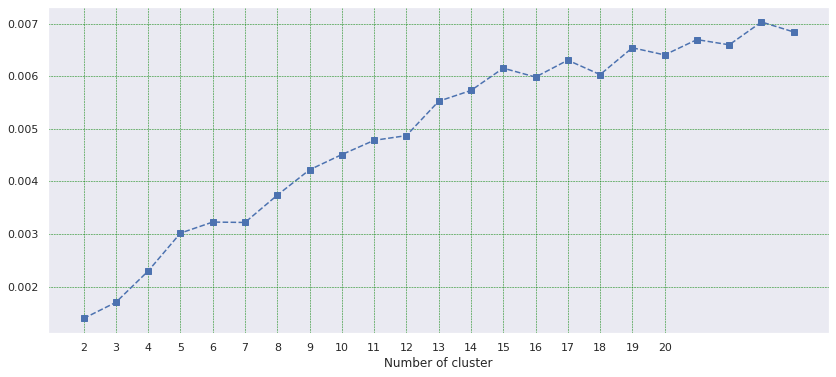

In [ ]:
#Plotting Sillhoute's score
plt.plot(sill,'bs--')
plt.xticks(list(range(0,19)),list(range(2,21)))
plt.grid(color='green',linestyle='--',linewidth=0.5)
plt.xlabel('Number of cluster')
plt.show()

###Looks like we can go with 20 clusters from both the visualizations

#**Implementing Kmeans**

In [ ]:
#Implementation of Kmeans
model = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=20, n_init=1)

In [ ]:
#Predicting from the model
y_pred = model.predict(X)
#Cluster Centers
centres = model.cluster_centers_
centres

array([[ 6.01163209e-03, -2.60208521e-18,  2.70870943e-03, ...,
         1.28633365e-03,  1.68078277e-03, -2.16840434e-19],
       [ 1.35198797e-03,  9.05998386e-04,  8.57485115e-04, ...,
         8.10046183e-04, -3.36102673e-18,  2.14097212e-04],
       [-8.67361738e-19, -2.81892565e-18,  8.67361738e-19, ...,
        -1.40946282e-18,  5.96311195e-19, -2.16840434e-19],
       ...,
       [-8.67361738e-19, -1.51788304e-18,  7.58941521e-19, ...,
        -7.58941521e-19,  3.25260652e-19, -1.62630326e-19],
       [ 2.13734787e-03,  1.05987055e-03,  9.75781955e-19, ...,
        -1.08420217e-18,  7.04731412e-19,  1.23178238e-03],
       [ 1.51788304e-18,  3.40933215e-03,  0.00000000e+00, ...,
        -4.33680869e-19,  7.58941521e-19,  1.22979651e-03]])

In [ ]:
#creating a column where each row is assigned to their separate cluster
df['cluster'] = model.labels_

In [ ]:
df.head()

In [ ]:
#Printing all the cluster centroids and their top 10 terms
clusters = df.groupby('cluster')    

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidfmodel.get_feature_names()

for i in range(20):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')


Cluster centroids: 

Cluster 0:
 show
 comedy
 special
 series
 host
 sketch
 tv
 life
 talk
 reality
------------
Cluster 1:
 life
 love
 new
 two
 series
 young
 finds
 lives
 find
 home
------------
Cluster 2:
 three
 find
 friends
 one
 lives
 different
 young
 men
 love
 women
------------
Cluster 3:
 woman
 young
 life
 love
 husband
 falls
 finds
 becomes
 meets
 family
------------
Cluster 4:
 world
 one
 ii
 around
 war
 two
 new
 history
 life
 become
------------
Cluster 5:
 begins
 dark
 secrets
 family
 young
 marriage
 past
 town
 boy
 mysterious
------------
Cluster 6:
 family
 old
 year
 new
 home
 life
 young
 love
 brother
 returns
------------
Cluster 7:
 team
 soccer
 player
 battle
 save
 new
 football
 must
 help
 mission
------------
Cluster 8:
 group
 women
 lives
 friends
 men
 new
 young
 two
 love
 students
------------
Cluster 9:
 city
 new
 york
 friends
 big
 take
 life
 mexico
 small
 town
------------
Cluster 10:
 school
 high
 student
 students
 teen
 n

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


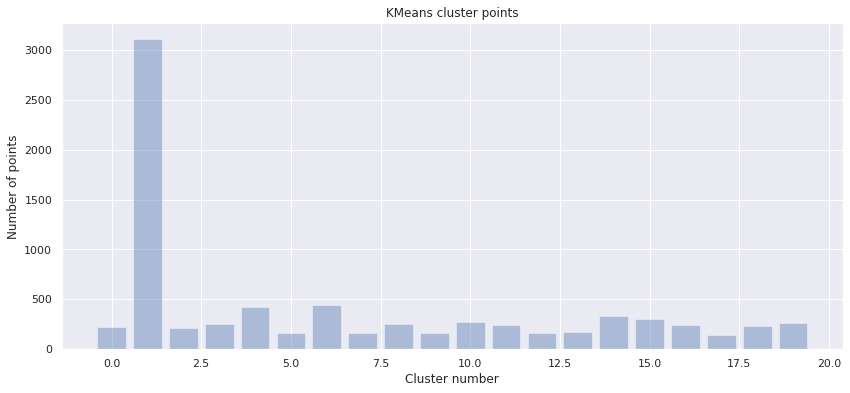

In [ ]:
#Analysing number of points present in each clusters
plt.bar([x for x in range(20)], df.groupby(['cluster'])['description'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [ ]:
#Getting each title where the title is assigned to cluster number 0
cluster_groups = df.groupby(['cluster'])
cluster_group_0 = cluster_groups.get_group(0)

In [ ]:
#Titles of Cluster number 0
cluster_group_0[['title','listed_in',]].head()

,title,listed_in
29,#blackAF,[TV Comedies]
65,13 Sins,"[Horror Movies, Thrillers]"
148,A Bad Moms Christmas,[Comedies]
174,A Futile and Stupid Gesture,[Comedies]
197,A Little Help with Carol Burnett,"[Stand-Up Comedy & Talk Shows, TV Comedies]"


#**Evaluation**

In [ ]:
# silhouette score of my clusters
print("Silhouette Coefficient: %0.5f"%silhouette_score(X, model.labels_, metric = 'euclidean'))

Silhouette Coefficient: 0.00618


In [ ]:
#Calinski-Harabasz index of my clusters
metrics.calinski_harabasz_score(X, model.labels_)

10.351489091777351

In [ ]:
#Davies-Bouldin index of my clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, model.labels_)


9.65055538896728

#**Hierarchical Clustering**

##**Finding number of clusters from Dendogram**

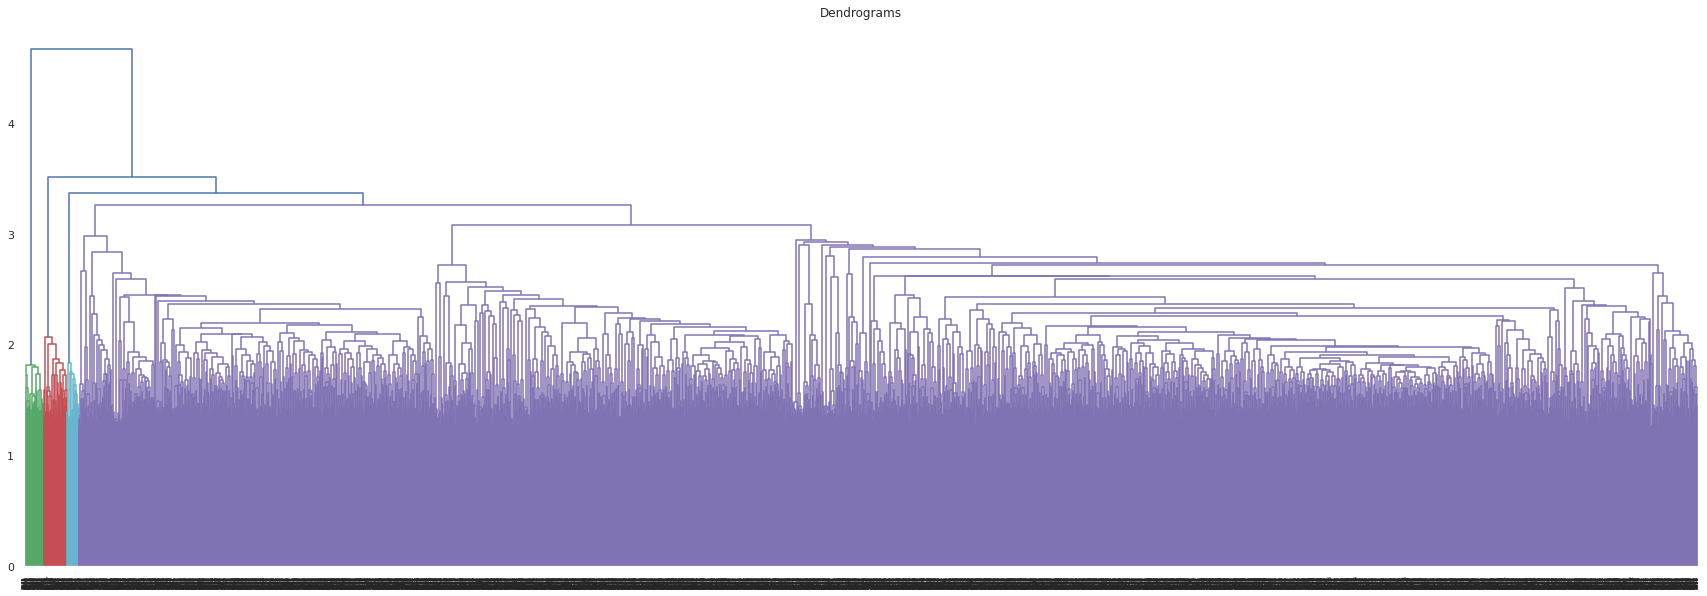

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

plt.axhline(y=180)

#**Implementing Agglomerative Clustering**

In [ ]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
aggh.fit(X)

AgglomerativeClustering(n_clusters=6)

In [ ]:
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [ ]:
df_hierarchical =df.copy()

In [ ]:
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_

In [ ]:
df_hierarchical.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,top_country,year_added,month_added,cast_name,cluster
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-F...",In a future where the elite inhabit an island ...,Brazil,2020,8,"[João Miguel, Bianca Comparato, Michel Gomes...",1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,Mexico,2016,12,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow...",Singapore,2018,12,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci...","In a postapocalyptic world, rag-doll robots hi...",United States,2017,11,"[Elijah Wood, John C. Reilly, Jennifer Conne...",1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...,United States,2020,1,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",1


In [ ]:
#Getting each title where the title is assigned to cluster number 0
cluster_groups = df_hierarchical.groupby(['cluster'])
cluster_group_0 = cluster_groups.get_group(0)

In [ ]:
#Titles of Cluster number 0
cluster_group_0[['title','listed_in',]].head()

,title,listed_in
10,1922,"[Dramas, Thrillers]"
12,1994,"[Crime TV Shows, Docuseries, International T..."
13,"2,215","[Documentaries, International Movies, Sports..."
19,'89,[Sports Movies]
22,​Maj Rati ​​Keteki,"[Dramas, International Movies]"


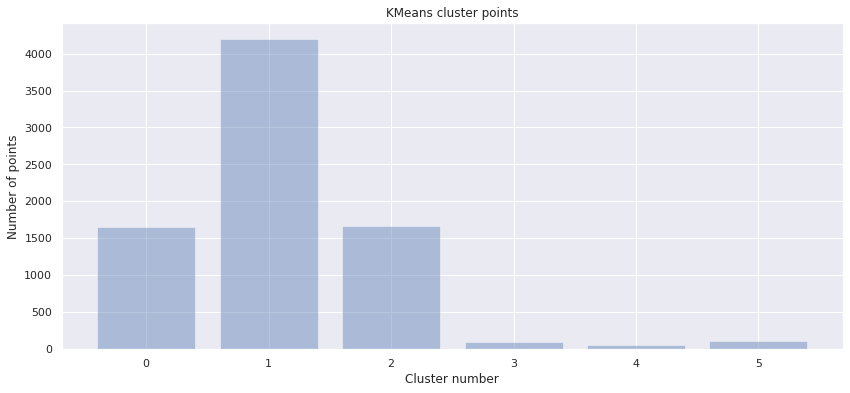

In [ ]:
#Analysing number of points present in each clusters
plt.bar([x for x in range(6)], df_hierarchical.groupby(['cluster'])['description'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

#**Evaluation Metrics for Hierarchical Clustering**

In [ ]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, aggh.labels_, metric='euclidean'))

Silhouette Coefficient: -0.002


In [ ]:
#Calinski-Harabasz index of my clusters
metrics.calinski_harabasz_score(X, aggh.labels_)

6.645912994138186

In [ ]:
#Davies-Bouldin index of my clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, aggh.labels_)

19.052732947464985

#**Conclusion**

###1. There are about 70% movies and 30% TV shows on Netflix.
###2. The United States has the highest number of content on Netflix by a huge margin followed by India.
###3. Raul Campos and Jan Sulter collectively have directed the most content on Netflix.
###4. Anupam Kher has acted in the highest number of films on Netflix.
###5. Drama is the most popular genre followed by comedy.
###6. More of the content is released in holiday season - October, November, December and January.
###7. The number of releases have significantly increased after 2015 and have dropped in 2021 because of Covid 19.
###8. NULL HYPOTHESIS -The number of TV shows on Netflix have tripled and number of movies have reduced by 2000 between 2010 and 2018. (REJECTED)
###9. By using Sillhouette's score and Elbow method , we generated optimal of 20 clusters for K Means and from Dendogram , 6 clusters were generated.
###10. In both the cases, one cluster accounts more than 3000 points whereas in other clusters the points were unevenly distributed. 3.For Tfidf K Means is best for identification than Hierarchical as the evaluation metrics also indicates the same.